# Understanding Descriptive Statistics

Import the necessary libraries here:

In [60]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [36]:
def dice_rolls(x):
    rolls = []
    while len(rolls) < x:
        dice_range = range(1,7)
        roll = random.choice(dice_range)
        rolls.append(roll)
    return rolls
df = pd.DataFrame(dice_rolls(10))
df.columns = ['Dice Roll']

In [37]:
df

,Dice Roll
0,1
1,3
2,6
3,1
4,2
5,2
6,6
7,4
8,2
9,1


#### 2.- Plot the results sorted by value.

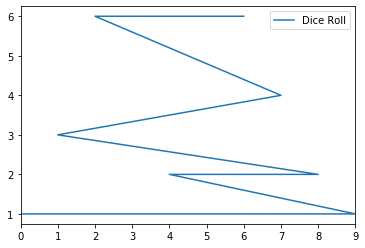

In [154]:
df.sort_values(by = 'Dice Roll').plot()
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

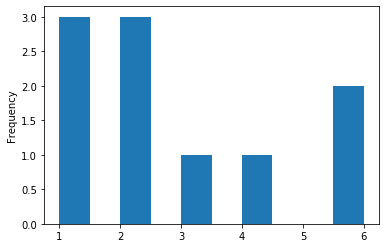

In [155]:
df['Dice Roll'].plot(kind = 'hist')

In [41]:
"""
The first plot shows the distribution of random rolls for each values 
The second plot shows the frequency distribution of the rolls
"""

'\nThe first plot shows the frequency of rolls for each values \nThe second plot shows the frequency distribution of the rolls\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [42]:
def mean(x):
    n = len(x)
    s = sum(x)
    return s / n

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [43]:
df_freq = df['Dice Roll'].value_counts().sort_index()
df_freq 

1    3
2    3
3    1
4    1
6    2
Name: Dice Roll, dtype: int64

In [44]:
mean(df_freq)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [45]:
def median(x):
    s = sorted(x)
    n = len(s)
    
    if n % 2 == 0:
        return s[(n // 2) + 1]
    
    else:
        return s[n // 2] 

median(df_freq)

2

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [48]:
def quartiles(x):
    s = sorted(x)
    n = len(s)

    q2 = median(x)
    
    if n % 2 == 0:
        mid = n // 2
        q1 = median(s[:mid])
        q3 = median(s[mid:])
    
    else:
        mid = (n + 1) // 2
        q1 = median(s[:mid])
        q3 = median(s[mid + 1:])
    
    return q1, q2, q3

quartiles(df_freq) 

(1, 2, 3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [49]:
roll_the_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_the_dice_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


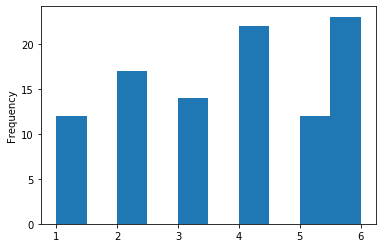

In [50]:
roll_the_dice_hundred['value'].sort_values().plot(kind = 'hist')

In [ ]:
"""
The plot shows the distribution of random rolls for each values 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [51]:
mean(roll_the_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [54]:
roll_the_dice_hundred_freq = roll_the_dice_hundred['value'].value_counts().sort_index()
roll_the_dice_hundred_freq

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

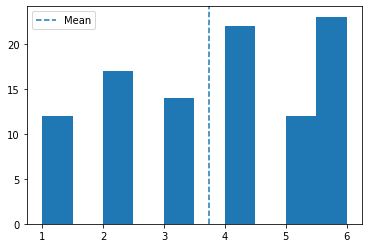

In [159]:
mean = roll_the_dice_hundred['value'].mean()

plt.hist(roll_the_dice_hundred['value'])
plt.axvline(mean, label = 'Mean', linestyle = '--')
plt.legend()
plt.show()

In [125]:
"""
I added the mean line to the graph
"""

'\nI added the mean line to the graph\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

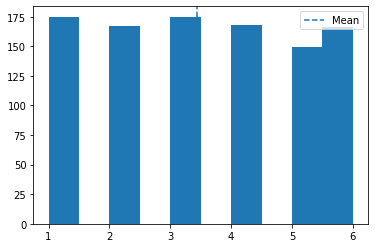

In [162]:
roll_the_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

mean = roll_the_dice_thousand['value'].mean()

plt.hist(roll_the_dice_thousand['value'])
plt.axvline(mean, label = 'Mean', linestyle = '--')
plt.legend()
plt.show()

In [ ]:
"""
The mean is not too different from the one before and the distribution look more uniform.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [164]:
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [166]:
ages_population['observation'].value_counts().sort_index()

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e0fb610>]],
      dtype=object)

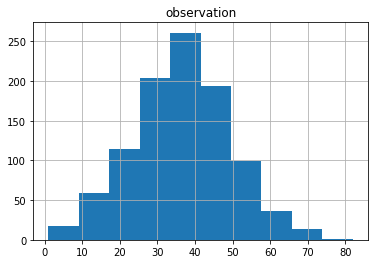

In [150]:
ages_population.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [133]:
ages_population.mean()

observation    36.56
dtype: float64

In [134]:
ages_population.std()

observation    12.8165
dtype: float64

In [ ]:
"""
Looking at the plot we can see that the mean is around 35 and the std around 15, 
which is confirmed by the calculations.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [145]:
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [167]:
ages_population2['observation'].value_counts().sort_index()

19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1efbf590>]],
      dtype=object)

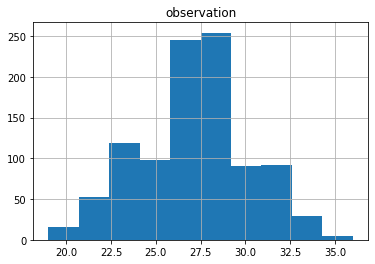

In [151]:
ages_population2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The differences between the values for this set is smaller: they go from around 15 to 40.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [152]:
ages_population2.mean()

observation    27.155
dtype: float64

In [153]:
ages_population2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [168]:
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [169]:
ages_population3['observation'].value_counts().sort_index()

1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: observation, Length: 75, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20890b50>]],
      dtype=object)

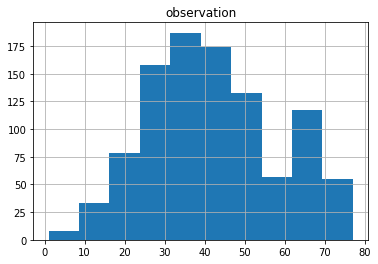

In [170]:
ages_population3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [171]:
ages_population3.mean()

observation    41.989
dtype: float64

In [172]:
ages_population3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
the mean is higher which is explained by the high frequency of the ages around 65.
The standard variation is also higher - the data is more spread out.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [177]:
print(ages_population3.quantile(0.25))
print(ages_population3.quantile(0.5))
print(ages_population3.quantile(0.75))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64


In [ ]:
"""
The mean and the median are close but the standard variation is high 
which means that the data is not concentrated the data are around the mean:
we can see that the 3rd quartile is larger than the 1st.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [186]:
ages_population3.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,observation
0.0,1.0
0.1,22.0
0.2,28.0
0.3,32.0
0.4,36.0
0.5,40.0
0.6,45.0
0.7,50.0
0.8,57.0
0.9,67.0


In [ ]:
"""
We can see an big increase between the 7th and the 9th percentiles
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""